In [194]:
import matplotlib.pyplot as plt
import numpy as np

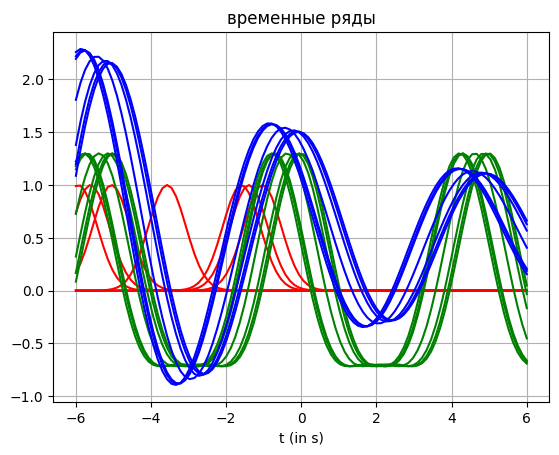

In [195]:
time_index = np.linspace(-6, 6, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 7
f0 = 0.2

# пульс с использованием гауссовой функции
for i in range(N):
    tseries_list["Tg"+str(i)] = np.exp(-0.5 * ((time_index - 5*d[i] + 6) / 0.5)**2)

# новый пульс с суммой гармонического и модулированного гармонического сигнала
for i in range(N):
    harmonic_signal = np.cos(2 * np.pi * f0 * time_index + d[i])
    modulating_signal = 0.3 * np.cos(4 * np.pi * f0 * time_index + 2 * d[i])
    tseries_list["Tc"+str(i)] = harmonic_signal + modulating_signal

# сигнал с экспоненциальным затуханием
for i in range(N):
    tseries_list["Texp"+str(i)]= np.exp(-0.1*time_index) * np.cos(2*np.pi*f0*time_index + d[i]) + 0.5

for i in range(N):
    plt.plot(time_index, tseries_list["Tg"+str(i)], '-r')
for i in range(N):
    plt.plot(time_index, tseries_list["Tc"+str(i)], '-g')
for i in range(N):
    plt.plot(time_index, tseries_list["Texp"+str(i)], '-b')

plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()
plt.show()

In [196]:
from dtaidistance import dtw
from scipy.spatial.distance import euclidean

tc1 = np.abs(tseries_list["Tc1"])
tc4 = np.abs(tseries_list["Tc4"])
print('dtw Tc1 u Tc4 =', dtw.distance(tc1, tc4))
print('eucl Tc1 u Tc4 =', euclidean(tc1, tc4), '\n')

texp1 = np.abs(tseries_list["Texp1"])
texp4 = np.abs(tseries_list["Texp4"])
print('dtw Texp1 u Tc1 =', dtw.distance(texp1, tc1))
print('eucl Texp1 u Tc4 =', euclidean(texp4, tc4), '\n')

print('dtw Texp1 u Tc1 =', dtw.distance(texp1, texp4))
print('eucl Texp1 u Tc4 =', euclidean(texp1, texp4))

dtw Tc1 u Tc4 = 0.33036557493018964
eucl Tc1 u Tc4 = 1.4750227581201651 

dtw Texp1 u Tc1 = 3.2099930734464373
eucl Texp1 u Tc4 = 5.383630942471487 

dtw Texp1 u Tc1 = 0.3692915441668731
eucl Texp1 u Tc4 = 1.3222279689571939


у dtw лучше точность

In [197]:
x = []
Y = []

for v in tseries_list:
    if v!= 'Time':
        x.append(tseries_list[v])
        c = v[:-1]
        if c == "Tc":
            Y.append(0)
        elif c == "Texp":
            Y.append(1)
        else: Y.append(2)


arr = np.arange(len(Y))
np.random.shuffle(arr)

print(Y)

X_train = []
X_test = []
y_train = []
y_test = []

for i in arr[:-5]:
    X_train.append(x[i])
    y_train.append(Y[i])

for i in arr[len(X_train):]:
    X_test.append(x[i])
    y_test.append(Y[i])

[2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


In [198]:
from pyts.classification import KNeighborsClassifier


clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 0


In [199]:
from pyts.classification import TimeSeriesForest


clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, y_train)


print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.804 0.138 0.058]]
Истинный класс для предсказаний 0


In [200]:
from pyts.classification import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 0


Все правильно предсказалось, хотя графики были очень похожи